# Inferential statistics (dataset 2)
Often, we are not only interested in describing our data with descriptive statistics like the mean and standard deviation, but want to know whether two or more sets of measurements are likely to come from the same underlying distribution. We want to draw inferences from the data. This is what inferential statistics is about.

To learn how to do this in python, let's use some example data:

To test whether a new wonder drug increases the eye sight, Linda and Anabel ran the following experiment with student subjects:

Experimental subjects were injected a saline solution containing 1nM of the wonder drug. Control subjects were injected saline without the drug. 
The drug is only effective for an hour or so. To assess the effect of the drug, eye sight was scored by testing the subjects' ability to read small text within one hour of drug injection.

However, Linda and Anabel used two different experimental designs:
1. Linda tested each student on ten consecutive days and measured the performance only after the experiment. She used 50 control (saline only) and 50 experimental subjects (saline+drug) - so 100 subjects in total.
2. Anabel only performed a single test per subject, but she measured the eye sight 30 minutes before and 30 minutes after the treatment. She tested 60 different subjects.

Our task is now to decide whether the wonder drug really improves eye sight as tested in these two sets of experiments.

Let's look at the second dataset.

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy

plt.style.use('ncb.mplstyle')

In [16]:
# load and explore the data
df2 = pd.read_csv('dat/5.03_inferential_stats_design2.csv')  # Anabel's data
display(df2)

,animal,score_before,score_after,treatment
0,0,14.248691,9.776487,0
1,1,9.943656,8.854063,0
2,2,12.730815,6.396923,0
3,3,14.489624,9.477586,0
4,4,11.638078,10.501259,0
...,...,...,...,...
95,95,13.320677,16.738985,1
96,96,14.809317,18.222113,1
97,97,12.318100,12.745123,1
98,98,12.204639,16.840564,1


### What is our _Null Hypothesis_, what is our _Alternative Hypothesis_?

- Null hypothesis: mean(after)=mean(before) for the treatment. The scores before and after treatment were generated by the same underlying distribution with _equal means_. Any differences are due to change alone. 
- Alternative hypothesis: mean(after)>mean(before). The scores before and after the treatment were generated by two distributions with _different means_. More specifically, after treatment, the mean is higher than before.

We should also formulate hypotheses and test them for the control data. Why?

Let's plot the data:

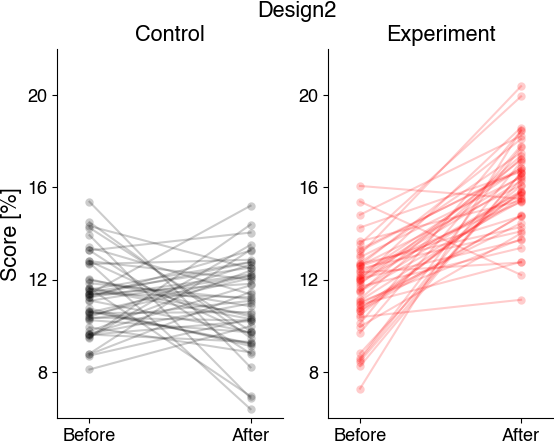

In [17]:
# Data from design 2
experiment = df2[df2['treatment']==1]
control = df2[df2['treatment']==0]

ax = plt.subplot(121)
plt.plot(control[['score_before', 'score_after']].T, 'o-k', alpha=0.2)
plt.xticks([0, 1], ['Before', 'After'])
plt.xlim(-0.2, 1.2)
plt.ylabel('Score [%]')
plt.title('Control')

plt.subplot(122, sharey=ax)
plt.plot(experiment[['score_before', 'score_after']].T, 'o-r', alpha=0.2)
plt.xticks([0, 1], ['Before', 'After'])
plt.xlim(-0.2, 1.2)
plt.yticks([8, 12, 16, 20])
plt.title('Experiment')
plt.suptitle('Design2')
plt.show()


### Are the samples independent? Are they paired or unpaired?
In Design 2, the subjects were tested before and after the treatment. This is a paired design, there is a pair of values per subject and we want to know whether there is a consistent change between the two values across subject. Standard tests can deal with this pair structure.

### Is the data normally distributed?

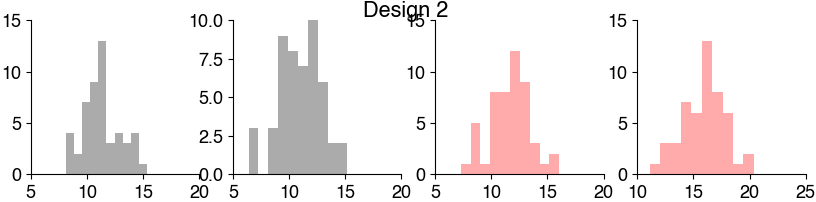

In [18]:
# Data from design 2
experiment = df2[df2['treatment']==1]
control = df2[df2['treatment']==0]

plt.figure(figsize=(10, 2))

plt.suptitle('Design 2')
plt.subplot(141)
plt.hist(control['score_before'], color='k', alpha=0.33, label='Control')
plt.subplot(142)
plt.hist(control['score_after'], color='k', alpha=0.33, label='Control')
plt.subplot(143)
plt.hist(experiment['score_before'], color='r', alpha=0.33, label='Experiment')
plt.subplot(144)
plt.hist(experiment['score_after'], color='r', alpha=0.33, label='Experiment')
plt.show()

### Mini exercise: Test for normality

In [19]:
print(scipy.stats.normaltest(df2['score_before']))
print(scipy.stats.normaltest(df2['score_after']))
for treatment in [0, 1]:
    print(scipy.stats.normaltest(df2[df2['treatment']==treatment]['score_before']))
    print(scipy.stats.normaltest(df2[df2['treatment']==treatment]['score_after']))

NormaltestResult(statistic=0.524704213185504, pvalue=0.7692401214989587)
NormaltestResult(statistic=5.991497590838853, pvalue=0.04999917391355247)
NormaltestResult(statistic=1.9194480969633543, pvalue=0.38299856042819425)
NormaltestResult(statistic=0.5416685807156066, pvalue=0.762742879783001)
NormaltestResult(statistic=0.6824007495187907, pvalue=0.7109164442223318)
NormaltestResult(statistic=0.7213469817400091, pvalue=0.6972066056291735)


### Mini Exercise: Run the tests
We now know all we need to know about our samples to select the correct test:
- paired or unpaired: ?
- normal: ?
- homoscedasticity: ?
- one/two-sided: ?

Check the docs to figure out how to use the correct test:
- unpaired (independent):
    - parametric: `scipy.stats.ttest_ind` ([docs](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html))
    - non-parametric (for non-normal data): `scipy.stats.mannwhitneyu` ([docs](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html))
- paired (or related):
    - parametric: `scipy.stats.ttest_rel` ([doc](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html))
    - non-parametric (for non-normal data): `scipy.stats.wilcoxon` ([doc](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.wilcoxon.html))

In [20]:
control = df2[df2['treatment']==0]
treatment = df2[df2['treatment']==1]
print('ctrl:', scipy.stats.ttest_rel(control['score_before'], treatment['score_after']))
print('experiment:', scipy.stats.ttest_rel(treatment['score_before'], treatment['score_after']))

ctrl: TtestResult(statistic=-12.437588548260049, pvalue=8.944952603892238e-17, df=49)
experiment: TtestResult(statistic=-11.394853495796683, pvalue=2.2143920212578637e-15, df=49)
